<a href="https://colab.research.google.com/github/jparkgit/ESAA-23-2/blob/main/Week3_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[과제함](https://cafe.naver.com/esaa2019?iframe_url_utf8=%2FArticleRead.nhn%253Fclubid%3D29858915%2526page%3D1%2526menuid%3D80%2526boardtype%3DL%2526articleid%3D2361%2526referrerAllArticles%3Dfalse)

기한: 9월 25일 (월) 18시 30분

과제: 파이썬 머신러닝 완벽가이드 ch2. 6 pg. 118~145 필사

# 5. 데이터 전처리

# 5.1 데이터 인코딩


*   Label Encoding
*   One Hot Encoding



### Label Encoding
* 문자열 값을 숫자형 카테고리 값으로 변환
* 몇몇 ML 알고리즘 (like linear reg) 에는 예측 성능이 떨어질 수 있음 (숫자 값이 크고 작음에 대한 특성이 작용하기 때문)
  * 트리 계열 알고리즘은 숫자의 이러한 특성을 반영하지 않음으로 괜찮음
* One Hot Encoding은 Label Encoding의 이러한 문제점을 해결함

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', 'fridge','microwave','computer','fan','fan','mixer','mixer']

encoder = LabelEncoder() # 객체로 생성
encoder.fit(items)
labels = encoder.transform(items)
print(labels) # 인코딩 반환값
print(encoder.classes_) # 인코딩 원본값
print(encoder.inverse_transform([0, 3, 4, 1, 2,2, 5, 5])) # 인코딩된 값을 다시 디코딩


[0 3 4 1 2 2 5 5]
['TV' 'computer' 'fan' 'fridge' 'microwave' 'mixer']
['TV' 'fridge' 'microwave' 'computer' 'fan' 'fan' 'mixer' 'mixer']


### One-Hot Encoding
행 형태로 되어 있는 Feature 값을 열 형태로 변환환 뒤 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지에는 0을 표시

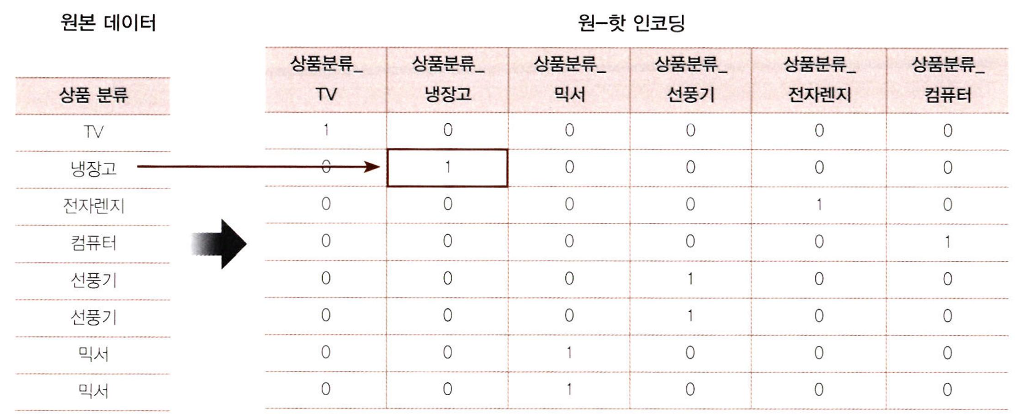

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', 'fridge','microwave','computer','fan','fan','mixer','mixer']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1) # 2차원으로 변환

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels.toarray()) # OHE 데이터
print(oh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
(8, 6)


One Hot Encoding 을 더 쉽게 하는 pandas API: get_dummies()\
Scikitrun의 OneHotEncoder 와 다르게 숫자형으로 변환할 필요없이 바로 변환 가능\

In [ ]:
import pandas as pd
df = pd.DataFrame({'item':['TV', 'fridge','microwave','computer','fan','fan','mixer','mixer']})
pd.get_dummies(df)

,item_TV,item_computer,item_fan,item_fridge,item_microwave,item_mixer
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,0,0,0,1
7,0,0,0,0,0,1


## 5.2 Feature Scaling & Normalization
* StandardScaler
* MinMaxScaler
* train & test data 스케일링 변환 시 유의점

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
print('features\' mean')
print(iris_df.mean())
print('\nfeatures\' var')
print(iris_df.var())

features' mean
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

features' var
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 객체생성
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # transform 시 스케일 변환되면 numpy ndarray로 반환됨
iris_df_scaled = pd.DataFrame(data=iris_scaled , columns=iris.feature_names) #DataFrame으로 변환
print(iris_df_scaled.mean())
print(iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
* 데이터값을 0과 1사이의 범위 값으로 변환
* (음수값이 있으면 -1에서 1 사이로 변환)
* 데이터 분포가 Gaussian이 아닐 경우에 적용 가능

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler=MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환, fit(),transform()호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터세트가 Numpy ndarray 로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### train test data 스케일링 변환 시 유의점
* Scaler 객체 이용해 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용함
* fit(), transform() 적용할 때 train data로 하면 test로는 다시 fit하지 않고 train으로 fit할 결과를 이용해 transform 변환을 적용해버림
* test train 스케일링 기준 정보가 달라지기 때문에 올바른 예측 결과 X
* fit_transform()은 fit과 transform을 순차적ㅇ로 수행하는 메소드이므로 train 데이터에서는 상관없지만 test data에서는 절대 사용 X


---


* 최선책: train test split 하기 전 전체 dataset에 스케일링을 적용한 뒤 분리하기
* 차선책: test data 변환 시에는 fit이나 fit_transform()을 적용하지 않고 train data로 이미 fit된 Scaler 객체를 이용해 transform()으로 변환

# 6. Scikitrun 으로 수행하는 Titanic 생존자 예측


In [ ]:
competition_name = "titanic"

# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")
kaggle_creds_path = "/content/drive/My Drive/kaggle.json"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#! pip install kaggle --quiet

#! mkdir ~/.kaggle
! cp "/content/drive/My Drive/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c {competition_name}

#! mkdir kaggle_data
! unzip {competition_name + ".zip"} -d kaggle_data

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 43.1MB/s]
Archive:  titanic.zip
  inflating: kaggle_data/gender_submission.csv  
  inflating: kaggle_data/test.csv    
  inflating: kaggle_data/train.csv   


In [ ]:
# Unmount your Google Drive
drive.flush_and_unmount()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
titanic_df = pd.read_csv('kaggle_data/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


* RangeIndex : DataFrame 인덱스의 범위를 나타냄. 전체 로우 수를 알 수 있음
* Scikitrun ML 알고리즘은 null 값을 허용하지 않음으로 null 값을 처리해야 함
  * fillna() 함수: Null 값을 평균 또는 고정값으로 변경

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

print('데이터세트 Null 값 개수',titanic_df.isnull().sum().sum())

데이터세트 Null 값 개수 0


In [ ]:
print('Sex값 분포:\n')
print(titanic_df['Sex'].value_counts())

print('\n Cabin값 분포:\n')
print(titanic_df['Cabin'].value_counts())

print('\n Embarked 값 분포:\n')
print(titanic_df['Embarked'].value_counts())

Sex값 분포:

male      577
female    314
Name: Sex, dtype: int64

 Cabin값 분포:

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin에 N값이 687이나 됨

### 성별에 따른 생존자 수, 생존확률

In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

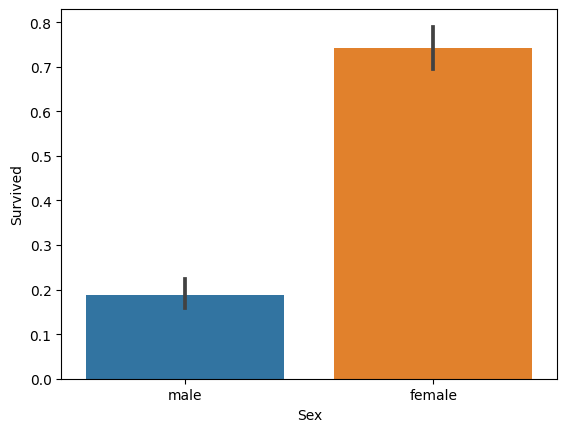

In [ ]:
sns.barplot(x='Sex', y='Survived',data=titanic_df)

### 객실 등급에 따른 생존 확률

<Axes: xlabel='Pclass', ylabel='Survived'>

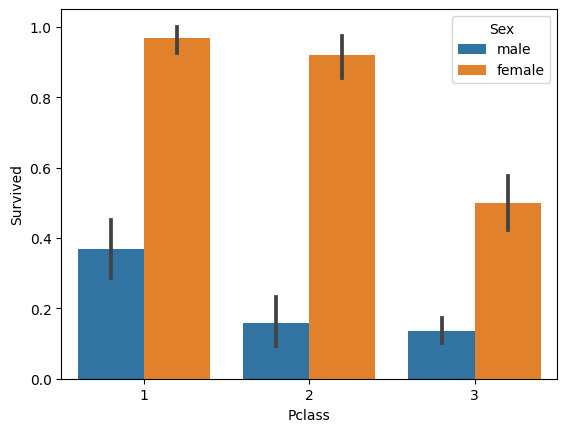

In [ ]:
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=titanic_df)

### Age에 따른 생존 확률
* 값 종류가 많이 때문에 범위별로 분류해 카테고리 값을 할당

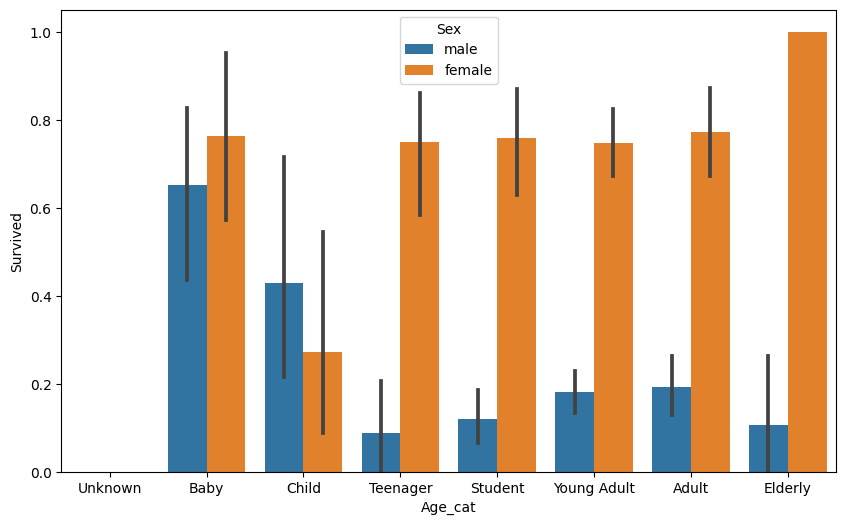

In [ ]:
# Age 칼럼을 받아서 해당하는 cat 반환
def get_category(age):
  cat=''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'
  return cat

plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기
group_names = ['Unknown', 'Baby', 'Child', 'Teenager','Student',
               'Young Adult', 'Adult', 'Elderly']

# lamda 식에 get_category 함수를 반환값으로 지정
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [ ]:
# 문자열 카테고리 Cabin, Sex, Embarked 를 레이블 인코딩 (숫자형 카테고리 feature로 변환)
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])
  return dataDF
titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


In [ ]:
#데이터 전처리를 전체적으로 호출하는 함수는 transform_features()이다.

#Null 처리함수수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)

  return df

#머신러닝 알고리즘에 불필요한 속성제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])

  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [43]:
# 원본 csv파일을 다시 로딩
titanic_df=pd.read_csv('kaggle_data/train.csv')

# 레이블인 survived 속성만 분리해 클래스결정값 데이터세트로 만들기
y_titanic_df=titanic_df['Survived']

# survived 속성을 드롭하여 피처 데이터세트 만들기
X_titanic_df=titanic_df.drop('Survived',axis=1)

# transform_features 이용해 피처 데이터세트 가공하기
from sklearn.preprocessing import LabelEncoder
X_titanic_df=transform_features(X_titanic_df)

In [44]:
# train_test_split() API 이용해 테스트 데이터세트 추출
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,
                                                 test_size=0.2)

ML 알고리즘인 Decison tree, random forest, logistic regression 이용해 타이타닉 생존자 예측

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
# Classifier 클래스 생성
dt_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
lr_clf=LogisticRegression(max_iter = 1000) # 경고 문자 해결

In [46]:
# Decision Tree Classifer 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreecClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))
# format {0} 소수점아래 자릿수 4로 제한

# RandomForestClassifier 학습/예측/평가

rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreecClassifier 정확도:0.7877
RandomForestClassifier 정확도0.7933
LogisticRegression 정확도0.7933


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3가지 알고리즘 중 RandomForestClassifier이 정확도가 가장 높음.\
Random_state 를 11로 설정해놓은 책에서는 Logistic regression이 정확도가 가장 높았음\
아직 최적화 작업도 안했고 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋아고 판단할 수 없음.\
교차 검증으로 모델들을 더 평가해보겠음


---

교차검증
* sklearn.model_selection 의
  * KFold
  * cross_val_score()
  * GridSearchCV

In [39]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold=KFold(n_splits=folds)
  scores=[]

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산.
    mean_score=np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.7430
평균 정확도: 0.7430
교차 검증 1 정확도: 0.7584
평균 정확도: 0.7507
교차 검증 2 정확도: 0.7865
평균 정확도: 0.7627
교차 검증 3 정확도: 0.7640
평균 정확도: 0.7630
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7756


In [40]:
#교차검증을 cross_val_score() API를 이용해 수행
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:4f}'.format(iter_count,accuracy))


print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.754190
교차 검증 1 정확도: 0.780899
교차 검증 2 정확도: 0.797753
교차 검증 3 정확도: 0.792135
교차 검증 4 정확도: 0.831461
평균 정확도: 0.7913


In [41]:
#GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측성능 측정하기기
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


예측 정확도가 87.15%로 향상. 테스트용데이터세트가 작기때문에 예측성능이 증가한것으로 보임.